Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Observing our Dataset

In [2]:
df = pd.read_csv('human_development_index_vs_mean_male_height.csv')
df

,entity,code,year,HDI_(UNDP),mean_male_height_(cm),continent_edited
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1980,0.228,165.381291,Asia
2,Afghanistan,AFG,1985,0.273,165.397122,Asia
3,Afghanistan,AFG,2002,0.373,NaN,Asia
4,Afghanistan,AFG,2003,0.383,NaN,Asia
...,...,...,...,...,...,...
24880,Zimbabwe,ZWE,1986,NaN,170.402765,Africa
24881,Zimbabwe,ZWE,1987,NaN,170.243318,Africa
24882,Zimbabwe,ZWE,1988,NaN,170.073876,Africa
24883,Zimbabwe,ZWE,1989,NaN,169.896967,Africa


Describing our Dataset (rounded to 3 decimal points, only HDI & height columns)

In [3]:
dataset = df.copy() # make a copy so we can go back to the original dataset if needed

dataset_1 = dataset.drop(columns=['entity','code','year','continent_edited']) # we only need data from HDI and height
dataset_1.describe().round(3)

,HDI_(UNDP),mean_male_height_(cm)
count,5001.000,21008.000
mean,0.652,168.327
std,0.167,5.225
min,0.190,152.885
25%,0.524,164.574
50%,0.677,168.315
75%,0.781,171.635
max,0.953,182.567


Data Cleaning #1: Dropping Null Values

In [4]:
new_dataset = dataset_1.dropna()
new_dataset

,HDI_(UNDP),mean_male_height_(cm)
1,0.228,165.381291
2,0.273,165.397122
119,0.625,174.100418
120,0.623,173.963038
121,0.645,173.717861
...,...,...
24766,0.481,169.340762
24767,0.476,169.152276
24768,0.473,168.963595
24769,0.467,168.774934


Data Cleaning #2: Finding Outliers using IQR Method

In [5]:
def find_outliers_IQR(new_dataset):

   q1 = new_dataset.quantile(0.25)
   q3 = new_dataset.quantile(0.75)

   IQR = q3-q1

   outliers = new_dataset[(new_dataset < (q1 - 1.5*IQR)) & (new_dataset > (q3 + 1.5*IQR))]

   return outliers

find_outliers_IQR(new_dataset).count()

HDI_(UNDP)               0
mean_male_height_(cm)    0
dtype: int64

Describing our Cleaned Dataset (rounded to 3 decimal points)

In [6]:
# since we don't have any outliers, we can keep using 'new_dataset'

new_dataset.describe().round(3)

,HDI_(UNDP),mean_male_height_(cm)
count,1221.000,1221.000
mean,0.597,171.582
std,0.167,5.260
min,0.190,159.887
25%,0.468,167.563
50%,0.624,171.239
75%,0.728,175.821
max,0.888,182.567


Finding the Correlation between Both Variables

In [7]:
correlations = new_dataset.corr()
print(correlations['mean_male_height_(cm)'])

HDI_(UNDP)               0.720545
mean_male_height_(cm)    1.000000
Name: mean_male_height_(cm), dtype: float64


Data Visualization on a Scatterplot

<AxesSubplot:title={'center':'Scatterplot of HDI and Mean Height'}, xlabel='HDI_(UNDP)', ylabel='mean_male_height_(cm)'>

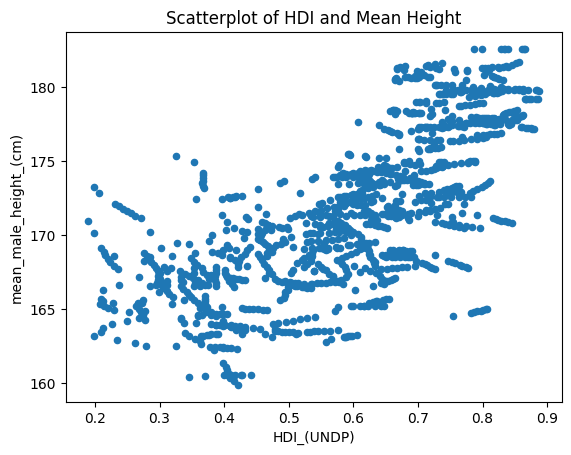

In [12]:
x = 'HDI_(UNDP)'
y = 'mean_male_height_(cm)'

new_dataset.plot.scatter(x, y, title='Scatterplot of HDI and Mean Height')

Data Visualization on a Scatterplot (with the Line of Best Fit)

Text(0.5, 1.0, 'Scatterplot of HDI and Male Height')

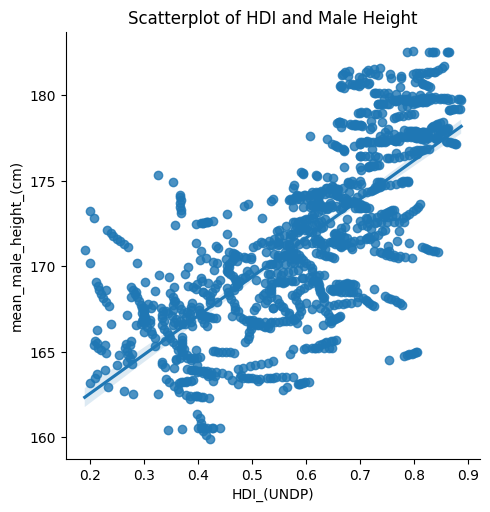

In [13]:
sns.lmplot(x, y, data=new_dataset)
plt.title("Scatterplot of HDI and Male Height")

Using the Simple Linear Regression Model to Describe the Relationship between Both Variables (with OLS Method)

In [14]:
x = new_dataset['HDI_(UNDP)']
y = new_dataset['mean_male_height_(cm)']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     mean_male_height_(cm)   R-squared:                       0.519
Model:                               OLS   Adj. R-squared:                  0.519
Method:                    Least Squares   F-statistic:                     1316.
Date:                   Sun, 09 Oct 2022   Prob (F-statistic):          4.64e-196
Time:                           23:26:45   Log-Likelihood:                -3312.0
No. Observations:                   1221   AIC:                             6628.
Df Residuals:                       1219   BIC:                             6638.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.0251 